<center> <h1> CP192 Work Product </h1> </center>

In this codebook, I want to test the feasibility of making changes to a Wikipedia cited sources, which is the basis for the first and second stage of my project. I also want to see if Wikipedia's HTML structure can give me information about the source that I can parse for credibility judgment. 


Summary: 
- I've created two scraping function: 
  + The first function takes in a Wikipedia page and returns all the URL mentioned in the citation section of that page
  + The second function takes in a Wikipedia page and returns all the Wikipedia page linked to the input page. 

- I've discussed the limitation of the functions I wrote and potential rememdies.

### Import required libraries

In [2]:
pip install requests

In [3]:
pip install validators

In [4]:
pip install beautifulsoup4

In [5]:
import requests
from bs4 import BeautifulSoup
import validators

### Create the first function

In [9]:
def get_cited_url():
  selectWikiPage = input(print("Please enter the Wikipedia page you wish to scrape from"))
  if "wikipedia.org" in selectWikiPage:
    response = requests.get(selectWikiPage)
    print(response.status_code)

    soup = BeautifulSoup(response.content, 'html.parser')

    #references is stored as an ordered list that has class attribute 'references'
    references = soup.find_all('ol',class_="references")
    ref_tree = BeautifulSoup(str(references), 'html.parser')
    links = ref_tree.find_all('a')
    for link in links:
      link = link.attrs['href']
      if validators.url(str(link)):
        print(link)
  else:
    print("Please enter a Wikipedia URl")

- Test the function

In [10]:
#testurl = "https://en.wikipedia.org/wiki/Cambodian%E2%80%93Vietnamese_War"
get_cited_url()

Please enter the Wikipedia page you wish to scrape from
https://en.wikipedia.org/wiki/Cambodian%E2%80%93Vietnamese_War
200
https://www.nytimes.com/1993/03/24/opinion/l-thailand-bears-guilt-for-khmer-rouge-934393.html
https://www.nytimes.com/2000/09/29/news/singaporean-tells-of-khmer-rouge-aid.html
https://web.archive.org/web/20180612192044/https://www.nytimes.com/2000/09/29/news/singaporean-tells-of-khmer-rouge-aid.html
https://www.newstatesman.com/politics/politics/2014/04/how-thatcher-gave-pol-pot-hand
https://web.archive.org/web/20180612140622/https://www.newstatesman.com/politics/politics/2014/04/how-thatcher-gave-pol-pot-hand
https://www.theguardian.com/world/2000/jan/09/cambodia
https://web.archive.org/web/20180612144544/https://www.theguardian.com/world/2000/jan/09/cambodia
https://www.nytimes.com/1988/10/12/world/reagan-vows-to-support-sihanouk-s-forces.html
https://books.google.ro/books?id=8ExpAAAAMAAJ&q=khmer+rouge
https://books.google.ro/books?hl=en&id=RXluAAAAMAAJ&dq=intern

### Create the second function

In [28]:
def get_related_wiki_pages():
  selectWikiPage = input(print("Please enter the Wikipedia page you wish to scrape from"))
  if "wikipedia.org" in selectWikiPage:
    response = requests.get(selectWikiPage)
    print(response.status_code)

    soup = BeautifulSoup(response.content, 'html.parser')
    all_refs = soup.find(id="bodyContent").find_all('a')
    for ref in all_refs:
      if ref['href']:
        if ref['href'].find("/wiki/") != -1: 
        # if '/wiki/' in ref.attrs['href']:
          print(ref['href'])
  else:
    print("Please enter a Wikipedia URl")


In [29]:
get_related_wiki_pages()

Please enter the Wikipedia page you wish to scrape from
https://en.wikipedia.org/wiki/Cambodian%E2%80%93Vietnamese_War
200
/wiki/%C4%90%E1%BA%A1i_Vi%E1%BB%87t%E2%80%93Khmer_War
/wiki/Vietnamese_invasions_of_Cambodia
/wiki/Third_Indochina_War
/wiki/Cold_War
/wiki/Sino-Soviet_split
/wiki/File:H_4_ill_639759_cambodia-phnom_penh-1979-61.jpg
/wiki/Cambodia
/wiki/Southern_Vietnam
/wiki/Thailand
/wiki/Khmer_Rouge
/wiki/Democratic_Kampuchea
/wiki/Cambodian_genocide
/wiki/People%27s_Republic_of_Kampuchea
/wiki/Sino-Vietnamese_War
/wiki/Sino-Vietnamese_conflicts,_1979%E2%80%931991
/wiki/Coalition_Government_of_Democratic_Kampuchea
/wiki/Vietnamese_border_raids_in_Thailand
/wiki/1991_Paris_Peace_Accords
/wiki/United_Nations_Transitional_Authority_in_Cambodia
/wiki/Democratic_Kampuchea
/wiki/Coalition_Government_of_Democratic_Kampuchea
/wiki/Khmer_Rouge
/wiki/Khmer_People%27s_National_Liberation_Front
/wiki/Funcinpec_Party
/wiki/Thailand
/wiki/Vietnamese_border_raids_in_Thailand
/wiki/China
/wiki/

KeyError: ignored

### Discussing limitations

- With sources that has URL, it was straightforward for me to scrape it. However, many scholarly sources were cited without an URL. My program skipped these sources completely. There sources are often mentioned in the "Sources" section, right belwo the "Citations" section 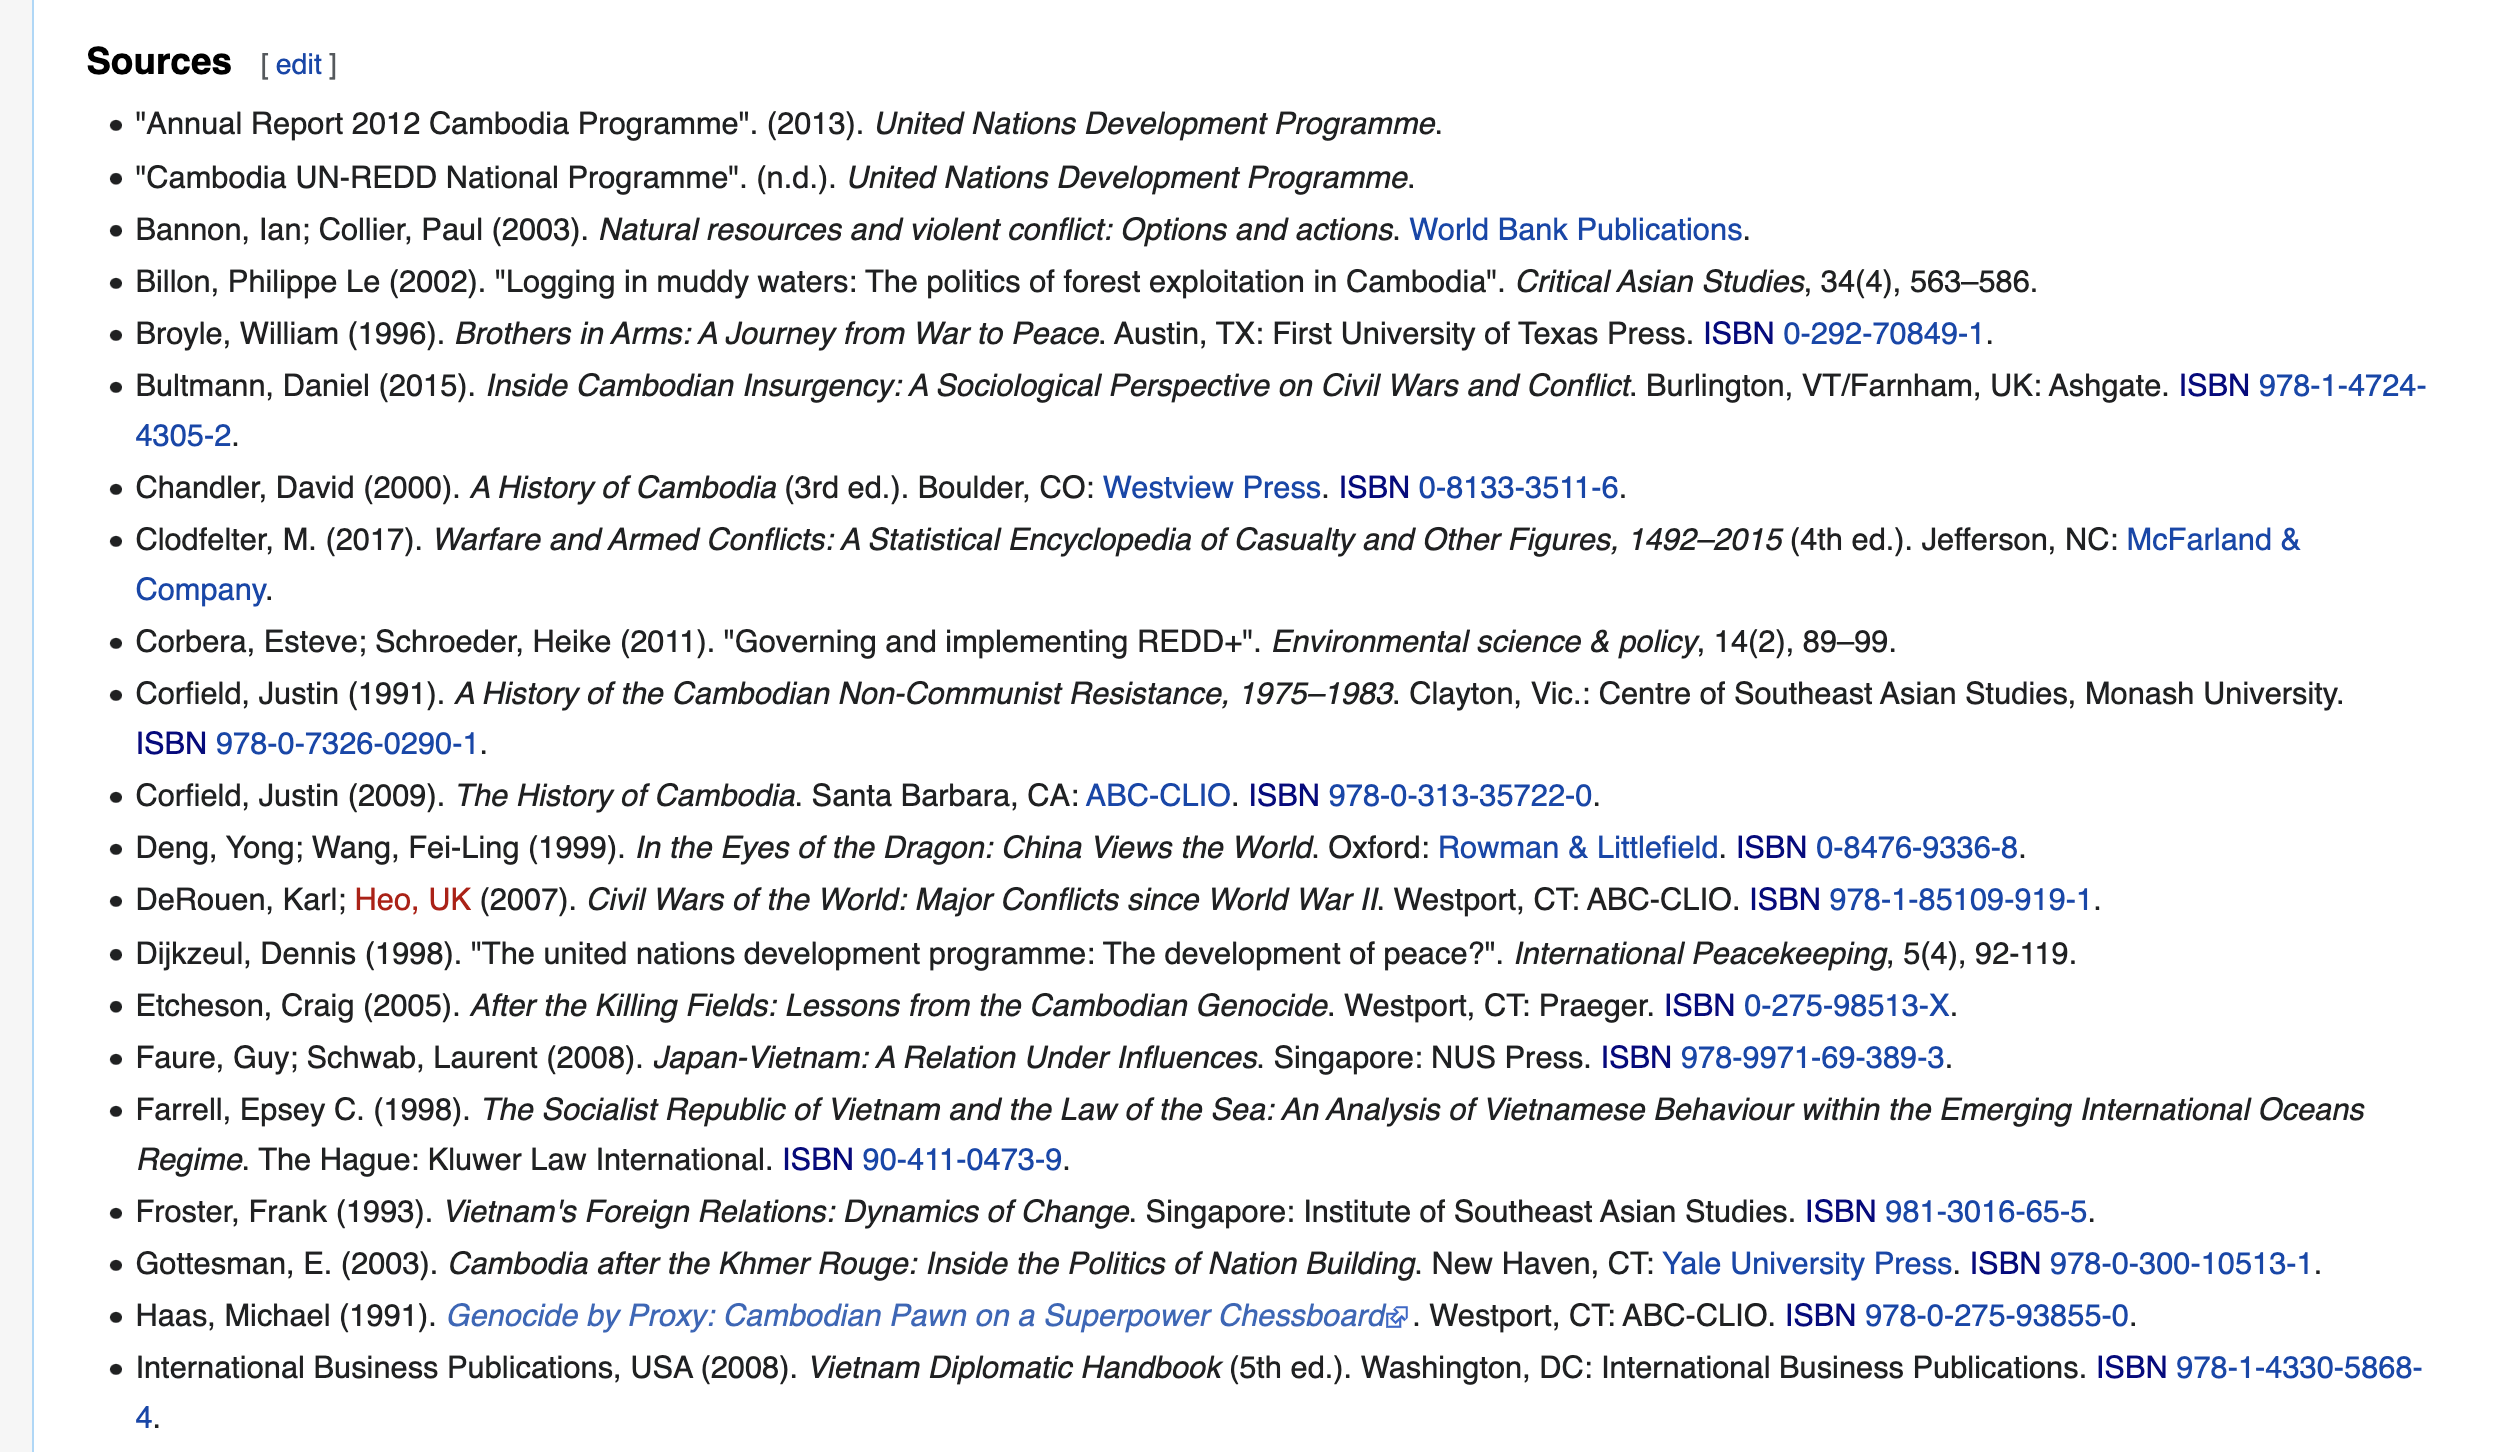

The challenge is that in the HTML tree, this section only has tag `<ul>` and no class or id to identify, which means I cannot specify for the scraper function where to find this "Sources" section with conventional methods. I have tried to create a new function but it hasn't worked properly so I won't include the function here. Overall, I think this is a problem that must be addressed for my Capstone and will consult professors on this matter.  